# Module 6 - Overfitting and Validation

- So far we've just trained the network for aribtrary lengths of time.
- Is there a way to determine the optimal amount or should we just train as long as we can (the more the better)?

Let's load some stuff to get it out of the way...

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import math
import tensorflow as tf

## Overfitting to the Training Dataset

- Train for too long and you end up with a classifier trained to classify the training data really well, but nothing else.
- But how do you know you have trained too long.

### Enter the validation dataset

- Randomly sampled (without replacement) from the original population
- Typically run after each training epoch.
- Used to either manually (or automatically) determine training duration

## An Example

We'll subclass our classifier changing the training routine to just train one batch then run the validation dataset.

In [1]:
import sys
sys.path.insert(0,'../PythonModules')

import LectureClassifier as lc
from MLClassUtilities import get_batch

In [2]:
validation_accuracy = []

class ClassifierWithValidation(lc.Classifier):
    
    def train_it(self, n_epochs, batch_size=50):
                 
        self.sess.run(tf.global_variables_initializer())
        
        for epoch in range(n_epochs):

            print("Running epoch:", epoch)

            for x_batch, y_batch, epoch in get_batch(self.train,
                                                     batch_size,
                                                     1,
                                                     n_classes = self.n_classes):

                self.sess.run(self.train_step, feed_dict={self.x: x_batch,
                                                          self.y: y_batch})

            # Save the validation accuracy history
            validation_accuracy.append(self.validate())
            print("   Validation accuracy", validation_accuracy[-1])
                 
    def validate(self):
                 
        tx, ty, _ = next(get_batch(self.valid,
                                   self.valid[0].shape[0],
                                   1,
                                   n_classes=self.n_classes))
                 
        return self.sess.run(self._accuracy, feed_dict={self.x: tx,
                                                        self.y: ty})

### For our example we'll run the wider layers and train for a lonnnnnng time.

In [4]:
data_file = '../../ARC_NN_Course_Data/AiBi.ubyte.pkl.xz'

cv = ClassifierWithValidation()
cv.load_data(data_file)

l1_width = 3000
l2_width = 5000
l3_width = 5000

full_layers = [(l1_width, tf.sigmoid, 4.0 * math.sqrt(6.0 / (cv.width + l1_width))),
              (l2_width, tf.sigmoid, math.sqrt(6.0 / l1_width)),
              (l3_width, tf.nn.relu, math.sqrt(2.0 / l2_width)),
              (cv.n_classes, None, math.sqrt(2.0 / l3_width))]

cv.build_model(full_layers)
%time cv.train_it(500)
print("Test dataset accuracy", cv.accuracy)
del cv

Created session
Running epoch: 0
   Validation accuracy 0.5991379
Running epoch: 1
   Validation accuracy 0.5991379
Running epoch: 2
   Validation accuracy 0.5991379
Running epoch: 3
   Validation accuracy 0.5991379
Running epoch: 4
   Validation accuracy 0.5991379
Running epoch: 5
   Validation accuracy 0.5991379
Running epoch: 6
   Validation accuracy 0.5991379
Running epoch: 7
   Validation accuracy 0.5991379
Running epoch: 8
   Validation accuracy 0.5991379
Running epoch: 9
   Validation accuracy 0.5991379
Running epoch: 10
   Validation accuracy 0.5991379
Running epoch: 11
   Validation accuracy 0.5991379
Running epoch: 12
   Validation accuracy 0.5991379
Running epoch: 13
   Validation accuracy 0.5991379
Running epoch: 14
   Validation accuracy 0.5991379
Running epoch: 15
   Validation accuracy 0.60775864
Running epoch: 16
   Validation accuracy 0.76724136
Running epoch: 17
   Validation accuracy 0.5991379
Running epoch: 18
   Validation accuracy 0.7758621
Running epoch: 19
   Va

   Validation accuracy 0.8189655
Running epoch: 159
   Validation accuracy 0.7413793
Running epoch: 160
   Validation accuracy 0.79741377
Running epoch: 161
   Validation accuracy 0.8060345
Running epoch: 162
   Validation accuracy 0.8060345
Running epoch: 163
   Validation accuracy 0.8060345
Running epoch: 164
   Validation accuracy 0.8060345
Running epoch: 165
   Validation accuracy 0.82327586
Running epoch: 166
   Validation accuracy 0.8103448
Running epoch: 167
   Validation accuracy 0.7801724
Running epoch: 168
   Validation accuracy 0.8146552
Running epoch: 169
   Validation accuracy 0.5344828
Running epoch: 170
   Validation accuracy 0.5603448
Running epoch: 171
   Validation accuracy 0.8146552
Running epoch: 172
   Validation accuracy 0.5344828
Running epoch: 173
   Validation accuracy 0.8189655
Running epoch: 174
   Validation accuracy 0.51293105
Running epoch: 175
   Validation accuracy 0.8060345
Running epoch: 176
   Validation accuracy 0.8189655
Running epoch: 177
   Valida

   Validation accuracy 0.80172414
Running epoch: 316
   Validation accuracy 0.8103448
Running epoch: 317
   Validation accuracy 0.80172414
Running epoch: 318
   Validation accuracy 0.79741377
Running epoch: 319
   Validation accuracy 0.8189655
Running epoch: 320
   Validation accuracy 0.8146552
Running epoch: 321
   Validation accuracy 0.4525862
Running epoch: 322
   Validation accuracy 0.8060345
Running epoch: 323
   Validation accuracy 0.82327586
Running epoch: 324
   Validation accuracy 0.8103448
Running epoch: 325
   Validation accuracy 0.7758621
Running epoch: 326
   Validation accuracy 0.8103448
Running epoch: 327
   Validation accuracy 0.67672414
Running epoch: 328
   Validation accuracy 0.8103448
Running epoch: 329
   Validation accuracy 0.8146552
Running epoch: 330
   Validation accuracy 0.82327586
Running epoch: 331
   Validation accuracy 0.82327586
Running epoch: 332
   Validation accuracy 0.8103448
Running epoch: 333
   Validation accuracy 0.8189655
Running epoch: 334
   Va

   Validation accuracy 0.8189655
Running epoch: 473
   Validation accuracy 0.82327586
Running epoch: 474
   Validation accuracy 0.7715517
Running epoch: 475
   Validation accuracy 0.82758623
Running epoch: 476
   Validation accuracy 0.82327586
Running epoch: 477
   Validation accuracy 0.8189655
Running epoch: 478
   Validation accuracy 0.82327586
Running epoch: 479
   Validation accuracy 0.82327586
Running epoch: 480
   Validation accuracy 0.8146552
Running epoch: 481
   Validation accuracy 0.82327586
Running epoch: 482
   Validation accuracy 0.8189655
Running epoch: 483
   Validation accuracy 0.82327586
Running epoch: 484
   Validation accuracy 0.8189655
Running epoch: 485
   Validation accuracy 0.82758623
Running epoch: 486
   Validation accuracy 0.8189655
Running epoch: 487
   Validation accuracy 0.82327586
Running epoch: 488
   Validation accuracy 0.8189655
Running epoch: 489
   Validation accuracy 0.82327586
Running epoch: 490
   Validation accuracy 0.82327586
Running epoch: 491
 

### Let's see how the validation accuracy changed

<IPython.core.display.Javascript object>


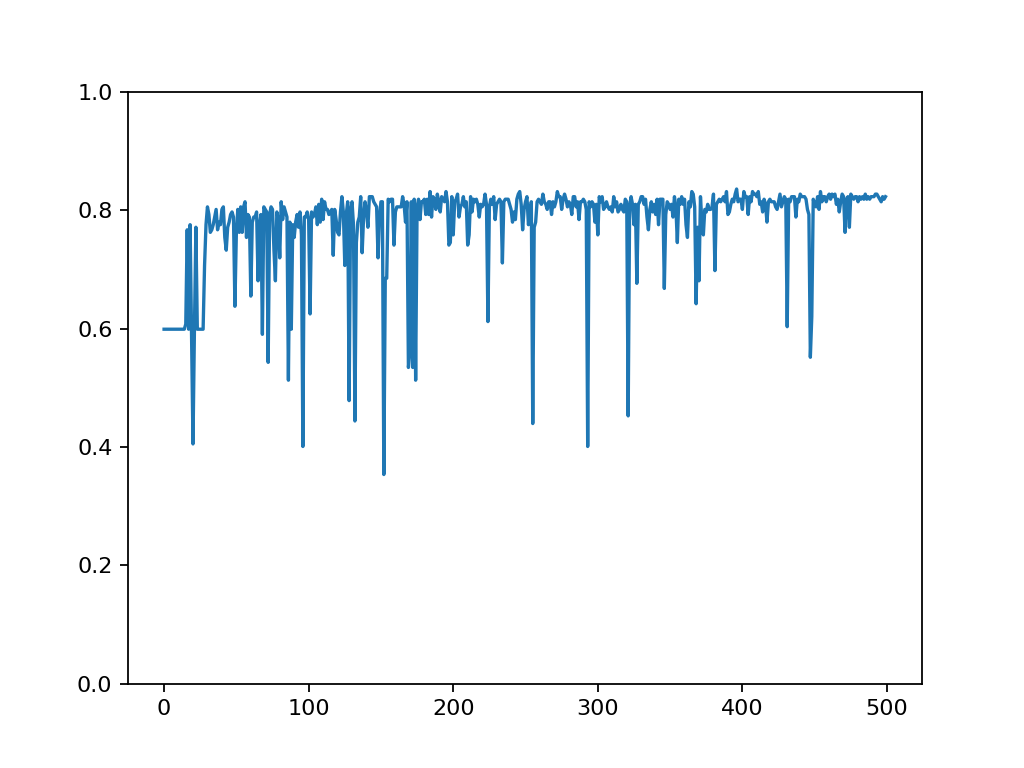

In [5]:
plt.plot(range(len(validation_accuracy)), validation_accuracy, label='Accuracy by Epoch')
plt.ylim(0,1)
plt.show();

## Let's detect when the model has stabilized

- A simple rule is if the model hasn't improved in some number of epochs

In [6]:
n_validation_epochs = 10

validation_accuracy = []

best = 0.0
best_epoch = 0

class StoppingClassifier(lc.Classifier):
    
    def train_it(self, n_epochs, batch_size=50):
                 
        global best, best_epoch
            
        self.sess.run(tf.global_variables_initializer())
        
        for epoch in range(n_epochs):

            print("Running epoch:", epoch)

            for x_batch, y_batch, _ in get_batch(self.train,
                                                 batch_size,
                                                 1,
                                                 n_classes = self.n_classes):

                self.sess.run(self.train_step, feed_dict={self.x: x_batch,
                                                          self.y: y_batch})

            # Save the validation accuracy history
            va = self.validate()
            validation_accuracy.append(va)
            print("   Validation accuracy", va)
    
            if va > best:
                best = va
                best_epoch = epoch
            
            if epoch - best_epoch > n_validation_epochs:
                print("Validation accuracy hasn't improved in", n_validation_epochs, "epochs, stopping")
                break

### And see if it stops in a reasonable amount of time

In [7]:
sc = StoppingClassifier()
sc.load_data(data_file)
sc.build_model(full_layers)
%time sc.train_it(1000)
print("Test dataset accuracy", sc.accuracy)
del sc

Created session
Running epoch: 0
   Validation accuracy 0.5991379
Running epoch: 1
   Validation accuracy 0.5991379
Running epoch: 2
   Validation accuracy 0.5991379
Running epoch: 3
   Validation accuracy 0.5991379
Running epoch: 4
   Validation accuracy 0.5991379
Running epoch: 5
   Validation accuracy 0.5991379
Running epoch: 6
   Validation accuracy 0.5991379
Running epoch: 7
   Validation accuracy 0.5991379
Running epoch: 8
   Validation accuracy 0.5991379
Running epoch: 9
   Validation accuracy 0.5991379
Running epoch: 10
   Validation accuracy 0.5991379
Running epoch: 11
   Validation accuracy 0.5991379
Validation accuracy hasn't improved in 10 epochs, stopping
CPU times: user 19.9 s, sys: 2.81 s, total: 22.7 s
Wall time: 23.8 s
Test dataset accuracy 0.55172414


## But, we didn't end up with the optimal model

- Yes, we stopped early but the best model would have been a while back
- Let's save the best model as we go and restore it when we stop

In [8]:
n_validation_epochs = 10

validation_accuracy = []

best = 0.0
best_epoch = 0

class StoppingClassifierWithRestore(mc.Classifier):
    
    def train_it(self, n_epochs, batch_size=50):
                 
        global best, best_epoch
            
        self.sess.run(tf.global_variables_initializer())
        
        saver = tf.train.Saver()
        
        for epoch in range(n_epochs):

            print("Running epoch:", epoch)

            for x_batch, y_batch, _ in get_batch(self.train,
                                                 batch_size,
                                                 1,
                                                 n_classes = self.n_classes):

                self.sess.run(self.train_step, feed_dict={self.x: x_batch,
                                                          self.y: y_batch})

            # Save the validation accuracy history
            va = self.validate()
            validation_accuracy.append(va)
            print("   Validation accuracy", va)
    
            if va > best:
                best = va
                best_epoch = epoch
                saved = saver.save(self.sess, "./StoppingClassifierSave")
            
            if epoch - best_epoch > n_validation_epochs:
                print("Validation accuracy hasn't improved in", n_validation_epochs, "epochs, stopping")
                break
                
        saver.restore(self.sess, saved)

### One last run resetting the model

In [9]:
scr = StoppingClassifierWithRestore()
scr.load_data(data_file)
scr.build_model(full_layers)
%time scr.train_it(1000)
print("Test dataset accuracy", scr.accuracy)
del scr

Created session
Running epoch: 0
   Validation accuracy 0.5991379
Running epoch: 1
   Validation accuracy 0.5991379
Running epoch: 2
   Validation accuracy 0.5991379
Running epoch: 3
   Validation accuracy 0.5991379
Running epoch: 4
   Validation accuracy 0.5991379
Running epoch: 5
   Validation accuracy 0.5991379
Running epoch: 6
   Validation accuracy 0.5991379
Running epoch: 7
   Validation accuracy 0.5991379
Running epoch: 8
   Validation accuracy 0.5991379
Running epoch: 9
   Validation accuracy 0.5991379
Running epoch: 10
   Validation accuracy 0.5991379
Running epoch: 11
   Validation accuracy 0.76293105
Running epoch: 12
   Validation accuracy 0.40086207
Running epoch: 13
   Validation accuracy 0.5991379
Running epoch: 14
   Validation accuracy 0.5991379
Running epoch: 15
   Validation accuracy 0.7758621
Running epoch: 16
   Validation accuracy 0.6551724
Running epoch: 17
   Validation accuracy 0.76724136
Running epoch: 18
   Validation accuracy 0.67672414
Running epoch: 19
   

### What was actually created

In [10]:
ll

total 2842292
-rw-r--r--. 1 crosbyr        101 Mar  6 11:37 checkpoint
-rw-r--r--. 1 crosbyr       1570 Oct 18 10:31 Lab-OvertrainingAndValidation.ipynb
-rw-r--r--. 1 crosbyr      87566 Mar  6 11:35 Lecture-OvertrainingAndValidation.ipynb
-rw-r--r--. 1 crosbyr        347 Feb  5 13:06 rise.css
-rw-r--r--. 1 crosbyr 2910276024 Mar  6 11:37 StoppingClassifierSave.data-00000-of-00001
-rw-r--r--. 1 crosbyr        925 Mar  6 11:37 StoppingClassifierSave.index
-rw-r--r--. 1 crosbyr     122472 Mar  6 11:37 StoppingClassifierSave.meta
